In [1]:
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

import time
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
import imp
from linetools.spectra.xspectrum1d import XSpectrum1D
import numpy as np
from pyigm.fN.fnmodel import FNModel
from pyigm.fN import tau_eff as teff
import matplotlib.pyplot as plt
import numpy as np



Bad key "legend.title_fontsize" on line 22 in
/home/jiawen/.config/matplotlib/stylelib/notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


-----------------------------------------------------------
-----------------------------------------------------------
 Install pymc if you want it
-----------------------------------------------------------


In [2]:
fN_I14 = FNModel('Gamma')
fN_I14.zmnx

(0.0, 10.0)

In [3]:
fN_default = FNModel.default_model()
fN_default

Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz


<FNModel: Hspline zmnx=(0.5,3) zpivot=2.4, gamma=1.5>

In [4]:
fN_default = FNModel.default_model()
lX = fN_default.calculate_lox(2.4, 17.19+np.log10(2.), 23.) 
print('l(X) = {:g}'.format(lX))

Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz
l(X) = 0.362987


In [5]:
fN_default = FNModel.default_model()
imp.reload(teff)
zval,teff_LL = teff.lyman_limit(fN_default, 0.5, 2.45)

Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz


In [6]:
zval[0], teff_LL[0]

(0.5, 1.8429875838699887)

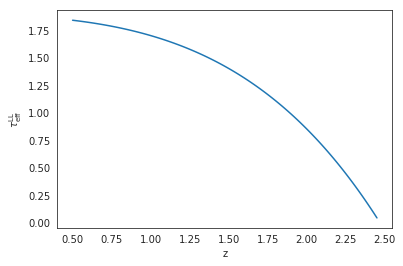

In [7]:
plt.clf()
plt.plot(zval,teff_LL)
# 
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}^{\rm LL}$')
plt.show()

In [8]:
#testing for f(n)

In [9]:
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

import time
import imp

import bokeh
from bokeh.io import output_notebook, show,output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

from pyigm.fN.fnmodel import FNModel
from pyigm.fN.constraints import FNConstraint

from pyigm.fN import tau_eff as teff

pyigm_path = imp.find_module('pyigm')[1]

Loading BokehJS ...

In [10]:
fn_file = pyigm_path+'/data/fN/fn_constraints_z2.5_vanilla.fits'
k13r13_file = pyigm_path+'/data/fN/fn_constraints_K13R13_vanilla.fits'
n12_file = pyigm_path+'/data/fN/fn_constraints_N12_vanilla.fits'

In [11]:
all_fN_cs = FNConstraint.from_fitsfile([fn_file,k13r13_file, n12_file])

In [12]:
fN_cs = [fN_c for fN_c in all_fN_cs if ((fN_c.ref != 'K02') & (fN_c.ref != 'PW09'))]
fN_dtype = [fc.fN_dtype for fc in fN_cs]
fN_cs

[<FNConstraint: fN_SLLS zeval=2.51004, ref=OPB07>,
 <FNConstraint: LLS_\tlox zeval=2.22584, ref=OPW12>,
 <FNConstraint: MFP_\lmfp zeval=2.44, ref=OPW13>,
 <FNConstraint: teff_\tlya zeval=2.4, ref=K05>,
 <FNConstraint: fN_Lya Forest zeval=2.37, ref=K13R13>,
 <FNConstraint: fN_DLA zeval=2.5, ref=N12>]

In [13]:
fN_model = FNModel.default_model()


Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz


In [14]:
data_dict = dict(Nbin=[], fN=[], ref=[], pcolor=[], zeval=[])

In [15]:
clrs = ['blue', 'green', 'red', 'purple']
cnt=0
for fN_c in fN_cs: 
    if fN_c.fN_dtype == 'fN':
        # Length
        ip = range(fN_c.data['NPT'])
        val = np.where(fN_c.data['FN'][ip] > -90)[0]
        npt = len(val)
        # Add in
        if npt > 0:
            ipv = np.array(ip)[val]
            data_dict['Nbin'] += list(np.median(fN_c.data['BINS'][:,ipv],0))
            #xerror = [ fN_c.data['BINS'][1,ipv]-xval, xval-fN_c.data['BINS'][0,ipv] ]
            #yerror = [ fN_c.data['SIG_FN'][1,ipv], fN_c.data['SIG_FN'][0,ipv] ] # Inverted!
            data_dict['fN'] += list(fN_c.data['FN'][ipv])
            data_dict['ref'] += [fN_c.ref]*npt
            data_dict['pcolor'] += [clrs[cnt]]*npt
            data_dict['zeval'] += [fN_c.zeval]*npt
            cnt += 1

In [16]:
plot_source = bokeh.models.ColumnDataSource(data_dict)

In [17]:
if fN_model is not None: 
    xplt = 12.01 + 0.01*np.arange(1100)
    line_dict = dict(xplt=xplt,
                     yplt=fN_model.evaluate(xplt, 2.4).flatten(),
                     ref=['P14']*1100, zeval=[fN_model.zpivot]*1100)
    model_source = bokeh.models.ColumnDataSource(line_dict)

In [18]:
if fN_model is not None: 
    xplt = 12.01 + 0.01*np.arange(1100)
    line_dict = dict(xplt=xplt,
                     yplt=fN_model.evaluate(xplt, 2.4).flatten(),
                     ref=['P14']*1100, zeval=[fN_model.zpivot]*1100)
    model_source = bokeh.models.ColumnDataSource(line_dict)
p = bokeh.plotting.figure(tools="reset, hover, tap, wheel_zoom, pan",
                          title="f(N)",
                          x_axis_label="log N_HI",
                          y_axis_label="log f(N)")
#
if fN_model is not None:
    p.line("xplt", "yplt", source=model_source, color='black', line_width=2, legend='P14')
# plot our data
data = p.scatter("Nbin", "fN", 
          source=plot_source, 
          color="pcolor", 
          size=8, legend='data')
# print useful data when you hover
hover = p.select(bokeh.models.HoverTool)
hover.tooltips = {"Ref"    : "@ref",
                  "redshift" : "@zeval"}
#
show(p)

In [19]:
con_dict = dict(xval=[], value=[], error=[], ftype=[], pcolor=[], ref=[], zeval=[])


In [20]:
itau = fN_dtype.index('teff') # Passes back the first one


In [21]:

fN_cs[itau].data['TEFF']


0.19778812

In [22]:
itau = fN_dtype.index('teff')     
con_dict['value'] += [float(fN_cs[itau].data['TEFF'])]
D_A = 1. - np.exp(-1. * con_dict['value'][0])
SIGDA_LIMIT = 0.1  # Allows for systemtics and b-value uncertainty
con_dict['error'] += [np.max([fN_cs[itau].data['SIG_TEFF'], (SIGDA_LIMIT*con_dict['value'][0])])]
con_dict['pcolor'] += ['blue']
con_dict['ref'] += [fN_cs[itau].ref]
con_dict['zeval'] += [fN_cs[itau].zeval]
con_dict['xval'] += [1]
con_dict['ftype'] += ['tau_eff']



In [23]:

iLLS = fN_dtype.index('LLS') # Passes back the first one
con_dict['value'] += [fN_cs[iLLS].data['LX']]
con_dict['error'] += [fN_cs[iLLS].data['SIG_LX']]
con_dict['pcolor'] += ['green']
con_dict['ref'] += [fN_cs[iLLS].ref]
con_dict['zeval'] += [fN_cs[iLLS].zeval]
con_dict['xval'] += [2]
con_dict['ftype'] += ['l(X)']


In [24]:
iMFP = fN_dtype.index('MFP') 
con_dict['value'] += [fN_cs[iMFP].data['MFP']/500]
con_dict['error'] += [fN_cs[iMFP].data['SIG_MFP']/500]
con_dict['pcolor'] += ['red']
con_dict['ref'] += [fN_cs[iMFP].ref]
con_dict['zeval'] += [fN_cs[iMFP].zeval]
con_dict['xval'] += [3]
con_dict['ftype'] += ['MFP/(500 Mpc)']


In [25]:

x_model = [1,2,3]
y_model = [None]*3


In [26]:
y_model[0] = teff.lyman_ew(1215.6701*(1+fN_cs[itau].zeval), 
                           fN_cs[itau].zeval+0.1, fN_model, 
                           NHI_MIN=fN_cs[itau].data['NHI_MNX'][0],
                           NHI_MAX=fN_cs[itau].data['NHI_MNX'][1])

read_sets: Using set file -- 
  /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [27]:
y_model[1] = fN_model.calculate_lox(fN_cs[iLLS].zeval, 
                                    17.19+np.log10(fN_cs[iLLS].data['TAU_LIM']), NHI_max=22.)

In [28]:
y_model[2] = fN_model.mfp(fN_cs[iMFP].zeval).value / 500.


In [29]:
x_model, y_model


([1, 2, 3], [0.19827288812908228, 0.3353448285305825, 0.5052785526476037])

In [30]:
con_source = bokeh.models.ColumnDataSource(con_dict)


In [31]:
yplt=fN_model.evaluate(xplt, 2.4).flatten()

In [32]:
x = [16.116112341773917, 16.231732489092252, 16.34735263641059, 16.462972783728926, 16.578592931047265, 16.6942130783656, 16.80983322568394, 16.925453373002274, 17.041073520320612, 17.156693667638947, 17.272313814957286, 17.38793396227562, 17.50355410959396, 17.619174256912295, 17.734794404230634, 17.85041455154897, 17.966034698867308, 18.081654846185643, 18.19727499350398, 18.312895140822317, 18.428515288140655, 18.54413543545899, 18.65975558277733, 18.775375730095668, 18.890995877414003, 19.006616024732338, 19.122236172050677, 19.237856319369016, 19.35347646668735, 19.46909661400569, 19.584716761324025, 19.700336908642363, 19.8159570559607, 19.931577203279037, 20.047197350597372, 20.16281749791571, 20.278437645234046, 20.394057792552385, 20.50967793987072, 20.62529808718906, 20.740918234507394, 20.856538381825732, 20.972158529144068, 21.087778676462406, 21.203398823780745, 21.31901897109908, 21.434639118417415, 21.550259265735754, 21.665879413054093]
y = [3.48687750e-03, 4.23559353e-03, 4.64203937e-03 ,3.74358014e-03,
 4.49229617e-03 ,3.65801259e-03 ,3.85053957e-03, 3.23017486e-03,
 3.55105316e-03 ,2.84512091e-03, 2.13918865e-03 ,1.73274281e-03,
 1.39047262e-03, 1.41186451e-03, 1.43325640e-03 ,1.00541867e-03,
 8.34283574e-04, 1.21933753e-03, 7.70107914e-04 ,7.48716028e-04,
 7.27324141e-04, 7.05932255e-04 ,9.84026780e-04 ,7.48716028e-04,
 8.12891687e-04 ,7.05932255e-04, 8.55675460e-04, 6.84540368e-04,
 1.09098621e-03 ,7.05932255e-04 ,5.98972822e-04, 6.20364709e-04,
 5.13405276e-04 ,7.70107914e-04 ,5.13405276e-04 ,6.41756595e-04,
 6.84540368e-04, 3.42270184e-04 ,3.63662071e-04 ,3.20878298e-04,
 1.71135092e-04, 6.41756595e-05, 1.28351319e-04, 1.06959433e-04,
 1.06959433e-04 ,4.27837730e-05, 6.41756595e-05, 2.13918865e-05,
 2.13918865e-05]

In [33]:
scale_x = 10**xplt
scale_x

array([1.02329299e+12, 1.04712855e+12, 1.07151931e+12, ...,
       9.54992586e+22, 9.77237221e+22, 1.00000000e+23])

In [34]:
yplt

array([ -9.73779721,  -9.75222554,  -9.76666313, ..., -29.41247355,
       -29.45410353, -29.49569924])

In [35]:
scale_factor = (1+5.88)**2 *68/3e5
prochaska_x = xplt
prochaska_y = np.multiply(10**yplt*scale_factor,scale_x)
prochaska_cut_x = []
prochaska_cut_y = []
for i,z in zip(prochaska_x,prochaska_y):
    if i >16 and i<22:
        prochaska_cut_x.append(i)
        prochaska_cut_y.append(z)


In [1]:
import pickle
import matplotlib.pyplot as plt
x =[16.009999999999998, 16.02, 16.03, 16.04, 16.05, 16.06, 16.07, 16.08, 16.09, 16.1, 16.11, 16.12, 16.13, 16.14, 16.15, 16.16, 16.17, 16.18, 16.189999999999998, 16.2, 16.21, 16.22, 16.23, 16.240000000000002, 16.25, 16.259999999999998, 16.27, 16.28, 16.29, 16.3, 16.31, 16.32, 16.33, 16.34, 16.35, 16.36, 16.37, 16.38, 16.39, 16.4, 16.41, 16.42, 16.43, 16.439999999999998, 16.45, 16.46, 16.47, 16.48, 16.490000000000002, 16.5, 16.509999999999998, 16.52, 16.53, 16.54, 16.55, 16.56, 16.57, 16.58, 16.59, 16.6, 16.61, 16.62, 16.63, 16.64, 16.65, 16.66, 16.67, 16.68, 16.689999999999998, 16.7, 16.71, 16.72, 16.73, 16.740000000000002, 16.75, 16.759999999999998, 16.77, 16.78, 16.79, 16.8, 16.81, 16.82, 16.83, 16.84, 16.85, 16.86, 16.87, 16.88, 16.89, 16.9, 16.91, 16.92, 16.93, 16.939999999999998, 16.95, 16.96, 16.97, 16.98, 16.990000000000002, 17.0, 17.009999999999998, 17.02, 17.03, 17.04, 17.05, 17.06, 17.07, 17.08, 17.09, 17.1, 17.11, 17.12, 17.13, 17.14, 17.15, 17.16, 17.17, 17.18, 17.189999999999998, 17.2, 17.21, 17.22, 17.23, 17.240000000000002, 17.25, 17.259999999999998, 17.27, 17.28, 17.29, 17.3, 17.31, 17.32, 17.33, 17.34, 17.35, 17.36, 17.37, 17.38, 17.39, 17.4, 17.41, 17.42, 17.43, 17.439999999999998, 17.45, 17.46, 17.47, 17.48, 17.490000000000002, 17.5, 17.509999999999998, 17.52, 17.53, 17.54, 17.55, 17.56, 17.57, 17.58, 17.59, 17.6, 17.61, 17.62, 17.63, 17.64, 17.65, 17.66, 17.67, 17.68, 17.689999999999998, 17.7, 17.71, 17.72, 17.73, 17.740000000000002, 17.75, 17.759999999999998, 17.77, 17.78, 17.79, 17.8, 17.81, 17.82, 17.83, 17.84, 17.85, 17.86, 17.87, 17.88, 17.89, 17.9, 17.91, 17.92, 17.93, 17.939999999999998, 17.95, 17.96, 17.97, 17.98, 17.990000000000002, 18.0, 18.009999999999998, 18.02, 18.03, 18.04, 18.05, 18.06, 18.07, 18.08, 18.09, 18.1, 18.11, 18.12, 18.13, 18.14, 18.15, 18.16, 18.17, 18.18, 18.189999999999998, 18.2, 18.21, 18.22, 18.23, 18.240000000000002, 18.25, 18.259999999999998, 18.27, 18.28, 18.29, 18.3, 18.31, 18.32, 18.33, 18.34, 18.35, 18.36, 18.37, 18.38, 18.39, 18.4, 18.41, 18.42, 18.43, 18.439999999999998, 18.45, 18.46, 18.47, 18.48, 18.490000000000002, 18.5, 18.509999999999998, 18.52, 18.53, 18.54, 18.55, 18.56, 18.57, 18.58, 18.59, 18.6, 18.61, 18.62, 18.63, 18.64, 18.65, 18.66, 18.67, 18.68, 18.689999999999998, 18.7, 18.71, 18.72, 18.73, 18.740000000000002, 18.75, 18.759999999999998, 18.77, 18.78, 18.79, 18.8, 18.81, 18.82, 18.83, 18.84, 18.85, 18.86, 18.87, 18.88, 18.89, 18.9, 18.91, 18.92, 18.93, 18.939999999999998, 18.95, 18.96, 18.97, 18.98, 18.990000000000002, 19.0, 19.009999999999998, 19.02, 19.03, 19.04, 19.05, 19.06, 19.07, 19.08, 19.09, 19.1, 19.11, 19.12, 19.13, 19.14, 19.15, 19.16, 19.17, 19.18, 19.189999999999998, 19.2, 19.21, 19.22, 19.23, 19.240000000000002, 19.25, 19.259999999999998, 19.27, 19.28, 19.29, 19.3, 19.31, 19.32, 19.33, 19.34, 19.35, 19.36, 19.37, 19.38, 19.39, 19.4, 19.41, 19.42, 19.43, 19.439999999999998, 19.45, 19.46, 19.47, 19.48, 19.490000000000002, 19.5, 19.509999999999998, 19.52, 19.53, 19.54, 19.55, 19.56, 19.57, 19.58, 19.59, 19.6, 19.61, 19.62, 19.63, 19.64, 19.65, 19.66, 19.67, 19.68, 19.689999999999998, 19.7, 19.71, 19.72, 19.73, 19.740000000000002, 19.75, 19.759999999999998, 19.77, 19.78, 19.79, 19.8, 19.81, 19.82, 19.83, 19.84, 19.85, 19.86, 19.87, 19.88, 19.89, 19.9, 19.91, 19.92, 19.93, 19.94, 19.95, 19.96, 19.97, 19.98, 19.990000000000002, 20.0, 20.009999999999998, 20.02, 20.03, 20.04, 20.05, 20.060000000000002, 20.07, 20.08, 20.09, 20.1, 20.11, 20.119999999999997, 20.130000000000003, 20.14, 20.15, 20.16, 20.17, 20.18, 20.189999999999998, 20.2, 20.21, 20.22, 20.23, 20.240000000000002, 20.25, 20.259999999999998, 20.27, 20.28, 20.29, 20.3, 20.310000000000002, 20.32, 20.33, 20.34, 20.35, 20.36, 20.369999999999997, 20.380000000000003, 20.39, 20.4, 20.41, 20.42, 20.43, 20.439999999999998, 20.45, 20.46, 20.47, 20.48, 20.490000000000002, 20.5, 20.509999999999998, 20.52, 20.53, 20.54, 20.55, 20.560000000000002, 20.57, 20.58, 20.59, 20.6, 20.61, 20.619999999999997, 20.630000000000003, 20.64, 20.65, 20.66, 20.67, 20.68, 20.689999999999998, 20.7, 20.71, 20.72, 20.73, 20.740000000000002, 20.75, 20.759999999999998, 20.77, 20.78, 20.79, 20.8, 20.810000000000002, 20.82, 20.83, 20.84, 20.85, 20.86, 20.869999999999997, 20.880000000000003, 20.89, 20.9, 20.91, 20.92, 20.93, 20.939999999999998, 20.95, 20.96, 20.97, 20.98, 20.990000000000002, 21.0, 21.009999999999998, 21.02, 21.03, 21.04, 21.05, 21.060000000000002, 21.07, 21.08, 21.09, 21.1, 21.11, 21.119999999999997, 21.130000000000003, 21.14, 21.15, 21.16, 21.17, 21.18, 21.189999999999998, 21.2, 21.21, 21.22, 21.23, 21.240000000000002, 21.25, 21.259999999999998, 21.27, 21.28, 21.29, 21.3, 21.310000000000002, 21.32, 21.33, 21.34, 21.35, 21.36, 21.369999999999997, 21.380000000000003, 21.39, 21.4, 21.41, 21.42, 21.43, 21.439999999999998, 21.45, 21.46, 21.47, 21.48, 21.490000000000002, 21.5, 21.509999999999998, 21.52, 21.53, 21.54, 21.55, 21.560000000000002, 21.57, 21.58, 21.59, 21.6, 21.61, 21.619999999999997, 21.630000000000003, 21.64, 21.65, 21.66, 21.67, 21.68, 21.689999999999998, 21.7, 21.71, 21.72, 21.73, 21.740000000000002, 21.75, 21.759999999999998, 21.77, 21.78, 21.79, 21.8, 21.810000000000002, 21.82, 21.83, 21.84, 21.85, 21.86, 21.869999999999997, 21.880000000000003, 21.89, 21.9, 21.91, 21.92, 21.93, 21.939999999999998, 21.95, 21.96, 21.97, 21.98, 21.990000000000002]
y = [0.006660519896324093, 0.006533460666858152, 0.006408864782812292, 0.006286702728048453, 0.006166944508652043, 0.006049559704167885, 0.005934517516929085, 0.005821786819504663, 0.005711336200288108, 0.005603134007255076, 0.005497092557906284, 0.00539312833473803, 0.005291215495159797, 0.005191327850727664, 0.0050934389087770515, 0.004997521912445681, 0.004903549879108395, 0.004811495637248592, 0.004721331861791657, 0.004633031107928728, 0.004546518850203649, 0.004461724138925083, 0.004378624635979678, 0.004297197778951117, 0.004217420813786073, 0.004139270826131471, 0.00406272477136449, 0.00398775950333886, 0.0039143518018726516, 0.003842478399002583, 0.0037720760526459922, 0.0037030845878482125, 0.003635485191283776, 0.0035692589017556173, 0.003504386635988684, 0.0034408492133362802, 0.003378627379418645, 0.0033177018287163353, 0.0032580532261398867, 0.003199662227599459, 0.0031424751642163745, 0.003086440998231461, 0.0030315442491505936, 0.002977769334131155, 0.002925100588564357, 0.002873522285773604, 0.0028230186558450476, 0.0027735739036105667, 0.0027251722258020182, 0.0026777978273966963, 0.0026314050816554704, 0.0025859506215976016, 0.0025414219904314017, 0.002497806654211419, 0.0024550920184978793, 0.0024132654442986963, 0.0023723142633092042, 0.002332225792465866, 0.002292987347830099, 0.0022545862578194, 0.002216983589232269, 0.0021801423541388493, 0.002144052759825225, 0.002108704948908763, 0.0020740890130540083, 0.0020401950061079135, 0.0020070129566677987, 0.0019745328800948782, 0.0019427447899870716, 0.001911638709124898, 0.0018811812255147924, 0.0018513406074458598, 0.0018221093604911848, 0.0017934799306389476, 0.0017654447158004605, 0.0017379960768503394, 0.0017111263482089442, 0.0016848278479778094, 0.0016590928876393531, 0.001633913781331872, 0.001609261629293495, 0.0015851089897177364, 0.0015614503221105657, 0.0015382800276576, 0.0015155924590746184, 0.0014933819300825266, 0.0014716427245148927, 0.0014503691050670314, 0.0014295553216948824, 0.0014091956196735907, 0.0013893032281590036, 0.001369873629243847, 0.00135087555820733, 0.0013322791715646258, 0.0013140559780232717, 0.0012961787753095672, 0.0012786215924606816, 0.0012613596372064745, 0.0012443692480887504, 0.0012276278509881435, 0.0012111688690086826, 0.00119502528816396, 0.0011791754066636552, 0.001163598474412052, 0.0011482746539810851, 0.0011331849849025167, 0.0011183113510553554, 0.0011036364509389332, 0.0010891437706323718, 0.0010748175592523084, 0.0010606571947311273, 0.0010466753675432594, 0.0010328766014981252, 0.0010192650930452055, 0.0010058447227407473, 0.0009926190668142398, 0.0009795914088039346, 0.000966764751232905, 0.0009541418272990605, 0.0009417251125543086, 0.0009294965942522474, 0.000917439135637412, 0.000905556133948202, 0.0008938507188809326, 0.0008823257632199445, 0.0008709838934919099, 0.0008598275006214643, 0.0008488587505668798, 0.0008380795949162516, 0.0008274917814263398, 0.0008170784951507212, 0.0008068237565068171, 0.0007967302509500837, 0.0007868004454957566, 0.0007770365984119746, 0.0007674407689010898, 0.0007580148267514443, 0.000748760461943956, 0.000739679194199287, 0.000730772382452634, 0.0007220241907140061, 0.000713419579941833, 0.0007049608508369473, 0.0006966501250957184, 0.0006884893542247096, 0.0006804803283355748, 0.0006726246849063601, 0.0006649239174976923, 0.0006573793844131266, 0.0006499923172945919, 0.0006427476377769857, 0.0006356310292081548, 0.0006286446612887636, 0.0006217905562653327, 0.0006150705970202251, 0.0006084865351548639, 0.000602039999055565, 0.0005957325019332803, 0.0005895654498293485, 0.0005835401495810291, 0.0005776420434477428, 0.0005718573041889102, 0.0005661881697747181, 0.000560636756520971, 0.0005552050666661261, 0.0005498949959728572, 0.0005447083413459795, 0.000539646808459974, 0.0005347120193909488, 0.0005299055202488209, 0.0005252130094636382, 0.0005206208894923205, 0.0005161316320841403, 0.0005117476097010399, 0.0005074711028399495, 0.0005033043074299193, 0.0004992493422979487, 0.0004953082566992049, 0.00049148303790858, 0.00048777561887189885, 0.00048417164734942996, 0.0004806574539952794, 0.000477235898099474, 0.0004739097611277039, 0.00047068175410561555, 0.00046755452515277756, 0.0004645306671629121, 0.0004616127256288057, 0.0004588032066119235, 0.00045610458485836414, 0.00045350739595284844, 0.00045100037813662505, 0.00044858331296919885, 0.0004462560105334807, 0.0004440183104912614, 0.00044187008315433647, 0.00043981123057311835, 0.00043784168764521097, 0.00043596142324609085, 0.000434170441384323, 0.000432467928399161, 0.0004308508212582515, 0.0004293158414455745, 0.0004278597920702572, 0.0004264795526856309, 0.0004251720743660551, 0.0004239343750292761, 0.0004227635349934572, 0.0004216566927584931, 0.00042061104100209716, 0.00041962797319076945, 0.00041870968361785353, 0.00041785463415842944, 0.00041706132486005215, 0.00041632829198782545, 0.00041565410613920057, 0.00041503737042526304, 0.00041447671871552746, 0.0004139708139434494, 0.0004135183464699618, 0.0004131205364562946, 0.0004127785023515861, 0.00041249082155106145, 0.0004122560968489373, 0.000412072954694414, 0.0004119400435071794, 0.0004118560320497958, 0.00041181960785498, 0.0004118294757055637, 0.0004118843561652616, 0.00041198635073674546, 0.0004121374651963353, 0.0004123362988900377, 0.00041258146527548586, 0.0004128715903013537, 0.0004132053108416417, 0.00041358127318313393, 0.000413998131564713, 0.0004144545467670229, 0.0004149491847514393, 0.00041548494624939225, 0.00041606465071182595, 0.00041668684869169026, 0.00041735009435240423, 0.00041805294392344904, 0.0004187939542112405, 0.000419571681164382, 0.00042038467849265555, 0.00042123149633921695, 0.0004221106800055942, 0.0004230258588622054, 0.0004239806025315158, 0.000424973358147474, 0.0004260025664462452, 0.0004270666602841214, 0.0004281640632155967, 0.0004292931881314315, 0.0004304524359570055, 0.000431640194411298, 0.00043285483682688354, 0.00043410064811190885, 0.0004353818807451958, 0.00043669683655560683, 0.0004380438014804191, 0.0004394210441620031, 0.0004408268146134393, 0.00044225934295386786, 0.0004437168382147036, 0.00044519748721801077, 0.00044669945352839876, 0.000448227590984553, 0.00044978675263067684, 0.0004513750647653888, 0.0004529906290934972, 0.00045463152144616776, 0.0004562957905821158, 0.00045798145707148476, 0.00045968651226461235, 0.0004614089173477572, 0.00046314660248799856, 0.00046490488247284836, 0.0004666891054799805, 0.0004684972042606446, 0.0004703270795421523, 0.000472176598941048, 0.00047404359597174196, 0.0004759258691530105, 0.0004778211812154006, 0.00047972725841235455, 0.0004816417899381419, 0.0004835704180258178, 0.0004855188529734841, 0.00048748482985962025, 0.0004894660462022398, 0.0004914601611530994, 0.0004934647948023944, 0.0004954775275971, 0.0004974958998764891, 0.00049951741152822, 0.0005015395217685629, 0.0005035680415707555, 0.0005056088829274991, 0.000507659595416477, 0.0005097176880938584, 0.0005117806290648701, 0.0005138458451786984, 0.0005159107218510819, 0.00051797260301849, 0.0005200287912273187, 0.0005220765478618314, 0.00052412167402488, 0.0005261701009764803, 0.0005282192239751169, 0.0005302663980119225, 0.0005323089378450363, 0.0005343441181685765, 0.0005363691739192918, 0.0005383813007244646, 0.0005403776554944356, 0.0005423553571629988, 0.000544320008653963, 0.000546277366722571, 0.0005482247250337285, 0.0005501593409325368, 0.000552078436003609, 0.0005539791967689166, 0.0005558587755266838, 0.0005577142913342088, 0.0005595428311372774, 0.0005613414510483799, 0.0005631153720462702, 0.000564869986273875, 0.000566602561815916, 0.0005683103382683882, 0.0005699905278377563, 0.0005716403165742591, 0.0005732568657408827, 0.0005748373133198068, 0.0005763787756575988, 0.0005778783492504484, 0.0005793407104481189, 0.0005807707178494095, 0.0005821657134390053, 0.0005835230222088887, 0.0005848399537490896, 0.0005861138039584996, 0.00058734185687589, 0.0005885213866315815, 0.0005896496595196163, 0.0005907239361902533, 0.0005917482231608488, 0.0005927267151060323, 0.0005936569485616208, 0.0005945364575092717, 0.0005953627753367971, 0.000596133436894536, 0.0005968459806466342, 0.000597497950916094, 0.0005980869002221068, 0.0005986103917080495, 0.0005990716877814084, 0.0005994742415642459, 0.0005998159202757376, 0.000600094604689299, 0.0006003081912666307, 0.0006004545943556338, 0.0006005317484496387, 0.0006005376105058474, 0.0006004701623201273, 0.0006003274129554155, 0.0006001118651336009, 0.0005998262136551418, 0.0005994687982658942, 0.0005990379882498019, 0.0005985321844810129, 0.0005979498215027254, 0.0005972893696295889, 0.0005965493370706132, 0.0005957282720693109, 0.0005948247650574887, 0.0005938406022174703, 0.0005927777639422737, 0.0005916351960950358, 0.0005904118877493354, 0.0005891068728731196, 0.000587719232002631, 0.000586248093902974, 0.0005846926372123068, 0.0005830520920663643, 0.000581325741699941, 0.0005795124442189774, 0.0005776123071656803, 0.0005756265545552386, 0.0005735564438449181, 0.0005714032647261196, 0.0005691683379025309, 0.0005668530138556692, 0.0005644586715994806, 0.0005619867174253251, 0.0005594385836388423, 0.0005568091375663174, 0.0005540946774670271, 0.0005512987969885382, 0.0005484250804799544, 0.0005454770986873018, 0.0005424584046266781, 0.0005393725296370122, 0.0005362229796144361, 0.0005330132314290966, 0.0005297467295252318, 0.0005264185743343831, 0.000523023599241945, 0.0005195648117913519, 0.0005160452029341829, 0.0005124677441558161, 0.0005088353847186664, 0.0005051510490235776, 0.0005014176340904193, 0.0004976380071580957, 0.0004938150034042072, 0.0004899450729422709, 0.000486024782426231, 0.00048205709466363976, 0.0004780449407718792, 0.00047399121782510403, 0.0004698987866240589, 0.00046577046958810376, 0.0004616090487693156, 0.0004574172639876022, 0.0004531978110859789, 0.0004489478483706579, 0.0004446646550719876, 0.00044035104282610465, 0.0004360097790589676, 0.0004316435852153678, 0.00042725513510953687, 0.00042284705339595916, 0.0004184219141587837, 0.00041398223961812707, 0.0004095304989513061, 0.00040506441861315505, 0.00040058184367439804, 0.0003960853417667993, 0.0003915774269865192, 0.00038706055872465573, 0.00038253714061238736, 0.0003780095195782009, 0.00037347998501509333, 0.00036895076805498126, 0.0003644240409478087, 0.00035989796536419464, 0.0003553708146532036, 0.0003508448403008004, 0.0003463222344488584, 0.0003418051293062441, 0.0003372955966623369, 0.0003327956475000176, 0.000328307231705298, 0.00032383223787043133, 0.00031937249318743724, 0.0003149264769954037, 0.0003104927705693847, 0.00030607326205577364, 0.00030166977797574845, 0.00029728408316004963, 0.00029291788077053725, 0.0002885728124051735, 0.00028425045828319617, 0.000279952337507183, 0.0002756799083986504, 0.00027143187113682585, 0.00026720701678121736, 0.0002630068491560248, 0.00025883281142862483, 0.0002546862864839553, 0.00025056859736784286, 0.00024648100779579667, 0.0002424247227240388, 0.0002384008889794393, 0.00023441059594503212, 0.00023045269084637587, 0.00022652610054045203, 0.00022263194827562511, 0.00021877130035325793, 0.00021494516684044925, 0.00021115450233328225, 0.00020740020676725764, 0.00020368312627192146, 0.00020000405406646465, 0.00019636373139325506, 0.00019277024156452892, 0.00018922707570043153, 0.00018572835944269677, 0.00018226862330255727, 0.00017884279051889448, 0.0001754461664210684, 0.000172074429106801, 0.00016872362125396506, 0.00016539014289228577, 0.00016207074496750318, 0.00015877575945800573, 0.00015551532529342553, 0.00015228637409596993, 0.0001490861134585933, 0.00014591201956774106, 0.00014276183027846462, 0.00013963353854768345, 0.00013652538613621138, 0.0001334358574946461, 0.00013036367375289244, 0.00012730955512954607, 0.00012427721990055914, 0.00012126990423640099, 0.00011829063772647716, 0.00011534224554155047, 0.00011242735124827005, 0.00010954838021989656, 0.00010670756358805645, 0.00010390694268116681, 0.00010114837389640581, 9.842881312932447e-05, 9.574549268503613e-05, 9.310041257807222e-05, 9.049539515999123e-05, 8.793208972908381e-05, 8.541197749764594e-05, 8.293637687047595e-05, 8.050644899000284e-05, 7.812320350511823e-05, 7.57875045227804e-05, 7.349688577288431e-05, 7.124909759859257e-05, 6.904511679242351e-05, 6.688578181708699e-05, 6.47717983524165e-05, 6.270374497089557e-05, 6.068207890812321e-05, 5.87071418965818e-05, 5.6779166032998534e-05, 5.489827965161128e-05, 5.3064687674731834e-05, 5.1277478890776424e-05, 4.953512341737828e-05, 4.783620573177405e-05, 4.617941738089329e-05, 4.4563550033522255e-05, 4.298748884628975e-05, 4.145020611829544e-05, 3.995075521195156e-05, 3.848826472028028e-05, 3.706340639957681e-05, 3.567688956755063e-05, 3.4327975419661504e-05, 3.3015954200651525e-05, 3.1740142706647414e-05, 3.049988190680848e-05, 2.9294534681623976e-05, 2.8123483675292656e-05, 2.698612925990129e-05, 2.5881887609339146e-05, 2.4809471036434693e-05, 2.376824995592481e-05, 2.275853771303549e-05, 2.17805204369835e-05, 2.0834266031030095e-05, 1.99197331026595e-05, 1.9036779774324567e-05, 1.8185172322104373e-05, 1.736459359629169e-05, 1.657465118436998e-05, 1.581357597754512e-05, 1.507976052666372e-05, 1.4372948409719127e-05, 1.3692815575149493e-05, 1.3038977158366285e-05, 1.2410994050386633e-05, 1.180837919625127e-05, 1.1230603605366006e-05, 1.067710206004181e-05, 1.0147278512343147e-05, 9.639803645479608e-06, 9.153459349914724e-06, 8.687772970820348e-06, 8.242244263272852e-06, 7.816349754913363e-06, 7.409546846370418e-06, 7.02127764735309e-06, 6.650972548611103e-06, 6.298053531984487e-06, 5.961937222567246e-06, 5.641666746069965e-06, 5.336360485549227e-06, 5.045540200265825e-06, 4.768722395491386e-06, 4.505420706029906e-06, 4.255148078081188e-06, 4.0174187552517715e-06, 3.79175007539072e-06, 3.577664085642374e-06]
with open('number_density_box_a_x.pkl', 'rb') as f:
    x_value = pickle.load(f)
with open('number_density_box_a_y.pkl', 'rb') as f:
    y_value = pickle.load(f)
with open('number_density_box_b_x.pkl', 'rb') as f:
    x_value2 = pickle.load(f)
with open('number_density_box_b_y.pkl', 'rb') as f:
    y_value2 = pickle.load(f)
with open('number_density_box_c_x.pkl', 'rb') as f:
    x_value3 = pickle.load(f)
with open('number_density_box_c_y.pkl', 'rb') as f:
    y_value3 = pickle.load(f)

In [2]:
import numpy as np
column_density_spacing = [10**16,10**18,10**20,10**21.5,10**22]
x_axis_2= [16,18,20,21.5,22]
median = [10**-15.87,10**-18.94,10**-21.51,10**-23.41,10**-25.08]
mean = [10**-8.38,10**-12.30,10**-16.00,10**-19.12,10**-21.20,10**-23.60,10**-24.94]
percentile_16th  = [10**(-8.38-.5),10**(-12.3-0.07),10**(-16.0-0.14),10**(-19.12-0.11),10**(-21.2-0.16),10**(-23.60-0.13),10**(-24.94-0.46)]
percentile_84th  = [10**(-8.38+.5),10**(-12.3+0.07),10**(-16.0+0.14),10**(-19.12+0.11),10**(-21.2+0.16),10**(-23.60+0.13),10**(-24.94+0.46)]
scale_factor = (1+5.8)**2 *68/3e5


median_scaled = np.multiply(median,scale_factor)



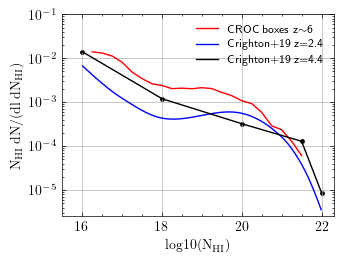

In [14]:
with plt.style.context('science','notebook'):
    plt.figure()   
    plt.plot(x_value,(y_value+y_value2+y_value3)/3,color='red',label ="CROC boxes z$\mathrm{\sim}$6")
    plt.plot(x,y,label ="Crighton+19 z$\mathrm{=}$2.4",color = "blue")
    
    plt.plot(x_axis_2, np.multiply(median_scaled,column_density_spacing),label = "Crighton+19 z$\mathrm{=}$4.4",color = "black")
    plt.scatter(x_axis_2, np.multiply(median_scaled,column_density_spacing),s=6,color = 'black')
    plt.yscale("log")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{N_{HI}\: dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.xlim(15.5)
    plt.ylim(10**(-5.6),10**(-1))
    plt.grid()
    plt.legend()
    plt.savefig("overplot.pdf")
    

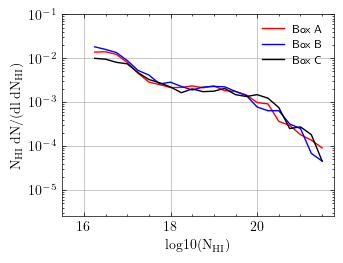

In [15]:
with plt.style.context('science','notebook'):
    plt.figure()   
    plt.plot(x_value,y_value,color='red',label ="Box A")
    plt.plot(x_value,y_value2,color='blue',label ="Box B")
    plt.plot(x_value,y_value3,color='black',label ="Box C")
    plt.yscale("log")
    plt.rcParams['font.size'] = 8
    plt.yscale("log") 
    plt.yticks()
    plt.xlabel("$\mathrm{log10(N_{HI})}$",fontsize = 10)
    plt.ylabel("$\mathrm{N_{HI}\: dN/(dl\: dN_{HI})}$",fontsize =10,)
    plt.xlim(15.5)
    plt.ylim(10**(-5.6),10**(-1))
    plt.grid()
    plt.legend()
    plt.savefig("combined_number_density_large_bins.pdf")